In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


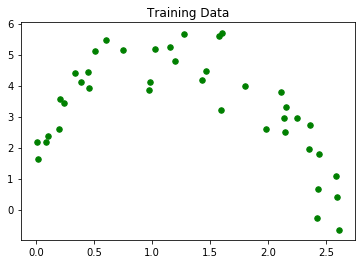

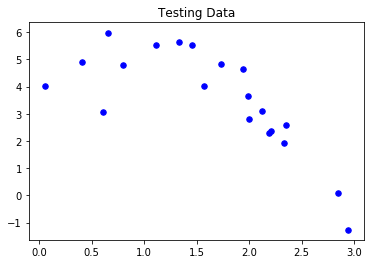

In [18]:
"""
# Question 2a)
"""
# Load the training data hw1xtr.dat and hw1ytr.dat into the memory
train_features = pd.read_csv('hw1xtr.dat',  header = None) 
train_desired_outputs = pd.read_csv('hw1ytr.dat', header = None) 

# # Plot training_data and desired_outputs
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'g', marker = 'o', s = 30)
plt.title('Training Data')
plt.show()

# Load the test data hw1xte.dat and hw1yte.dat into the memory
test_features = pd.read_csv('hw1xte.dat',  header = None) 
test_desired_outputs = pd.read_csv('hw1yte.dat', header = None) 

# # Plot training_data and desired_outputs
plt.scatter(test_features.values, test_desired_outputs.values, color = 'b', marker = 'o', s = 30)
plt.title('Testing Data')
plt.show()


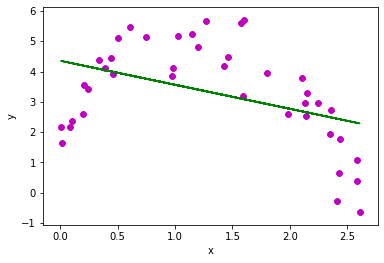

MSE on the training set:  2.1739455790492586


In [19]:
"""
# Question 2b)
"""
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values

N = len(train_features)
X = np.c_[np.ones(N), train_features_vals]
A = np.linalg.inv(X.T@X)
D = A@X.T
result = D@train_desired_outputs_vals

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    # Predicted response vector 
    global y_pred
    y_pred = b[0] + b[1]*x 
    
    # Plotting the regression line 
    plt.plot(x, y_pred, color = "g") 

    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

    # Function to show plot 
    plt.show() 

# Plot scatter plot
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)
plot_regression_line(train_features_vals, train_desired_outputs_vals, result)

# Find average error on the training set
A = np.square(y_pred - train_desired_outputs_vals)
error = np.sum(A)/N
print('MSE on the training set: ', error)



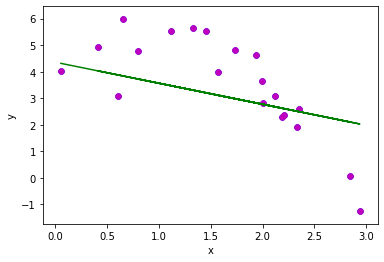

Average error on the testing set:  2.3118753456727985


In [20]:
"""
# Question 2c)
"""
test_features_vals = test_features.values
test_desired_outputs_vals = test_desired_outputs.values

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)

y_pred_test = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    # Predicted response vector 
    global y_pred_test
    y_pred_test = b[0] + b[1]*x 
    
    # plotting the regression line 
    plt.plot(x, y_pred_test, color = "g") 

    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

    # Function to show plot 
    plt.show() 

plot_regression_line(test_features_vals, test_desired_outputs_vals, result)

# Find average error on the training set
A = np.square(y_pred_test - test_desired_outputs_vals)
error = np.sum(A)/test_features_vals.shape[0]
print('Average error on the testing set: ', error)



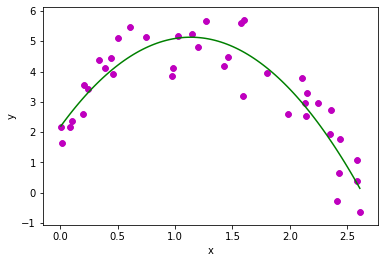

Average error on the training set:  0.4846845031271553


In [22]:
"""
# Question 2d - TRAIN)
"""
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values

# # Plot scatter plot
# plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)

N = len(train_features)
X = np.c_[np.ones(N), train_features_vals, np.square(train_features)]
A = np.linalg.inv(X.T@X)
D = A@X.T
result = D@train_desired_outputs_vals

y_pred = []
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(train_features_vals.min(), train_features_vals.max(), 100)
    global y_pred
    y_pred = b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 
    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y')     

# Plot scatter plot
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)
plot_regression_line(train_features_vals, train_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[2]*np.square(train_features_vals) + result[1]*train_features_vals + result[0]  - train_desired_outputs_vals)
error = np.sum(A)/N
print('Average error on the training set: ', error)

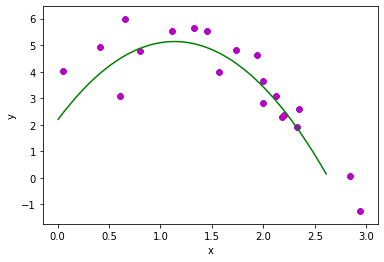

Average error on the testing set:  0.757363565551813
2nd-order polynomial regression is a better fit than linear regression.


In [6]:
"""
# Question 2d - TEST)
"""
test_features_vals = test_features.values
test_desired_outputs_vals = test_desired_outputs.values

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(train_features_vals.min(), train_features_vals.max(), 100)
    global y_pred
    y_pred = b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 

    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)
plot_regression_line(test_features_vals, test_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[2]*np.square(test_features_vals) + result[1]*test_features_vals + result[0]  - test_desired_outputs_vals)
error = np.sum(A)/test_features_vals.shape[0]
print('Average error on the testing set: ', error)
print('2nd-order polynomial regression is a better fit than linear regression.')


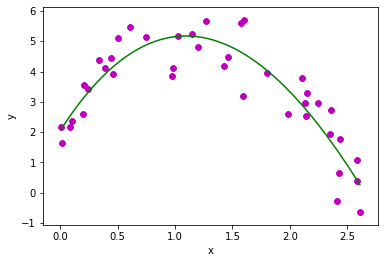

Average error on the training set:  0.48055213344532577


In [7]:
"""
# Question 2e - TRAIN)
"""
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values

# Plot scatter plot
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)

N = len(train_features)
X = np.c_[np.ones(N), train_features_vals, np.square(train_features), np.power(train_features, 3)]
A = np.linalg.inv(X.T@X)
D = A@X.T
result = D@train_desired_outputs_vals

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(train_features_vals.min(), train_features_vals.max(), 100)
    global y_pred
    y_pred = b[3]*np.power(x_line, 3) + b[2]*np.square(x_line) + b[1]*x_line + b[0]     
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 

    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

plot_regression_line(train_features_vals, train_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[3]*np.power(train_features_vals, 3) + result[2]*np.square(train_features_vals) + result[1]*train_features_vals + result[0]  - train_desired_outputs_vals)
error = np.sum(A)/N
print('Average error on the training set: ', error)

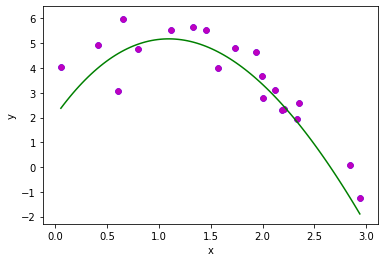

Average error on the testing set:  0.6911245362889507
3rd-order polynomial regression is a better fit than 2nd-order polynomial regression.


In [8]:
"""
# Question 2e - TEST)
"""
test_features_vals = test_features.values
test_desired_outputs_vals = test_desired_outputs.values

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(test_features_vals.min(), test_features_vals.max(), 100)
    global y_pred
    y_pred = b[3]*np.power(x_line, 3) + b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 
    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

plot_regression_line(test_features_vals, test_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[3]*np.power(test_features_vals, 3) + result[2]*np.square(test_features_vals) + result[1]*test_features_vals + result[0]  - test_desired_outputs_vals)
error = np.sum(A)/test_features_vals.shape[0]
print('Average error on the testing set: ', error)
print('3rd-order polynomial regression is a better fit than 2nd-order polynomial regression.')


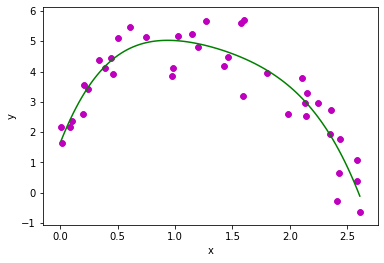

Average error on the training set:  0.43664763409971546


In [9]:
"""
# Question 2f - TRAIN)
"""
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values

# Plot scatter plot
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)

N = len(train_features)
X = np.c_[np.ones(N), train_features_vals, np.square(train_features), np.power(train_features, 3), np.power(train_features, 4)]
A = np.linalg.inv(X.T@X)
D = A@X.T
result = D@train_desired_outputs_vals

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(train_features_vals.min(), train_features_vals.max(), 100)
    global y_pred
    y_pred = b[4]* np.power(x_line, 4) + b[3]*np.power(x_line, 3) + b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 
    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

plot_regression_line(train_features_vals, train_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[4]*np.power(train_features_vals, 4) + result[3]*np.power(train_features_vals, 3) + result[2]*np.square(train_features_vals) + result[1]*train_features_vals + result[0]  - train_desired_outputs_vals)
error = np.sum(A)/N
print('Average error on the training set: ', error)

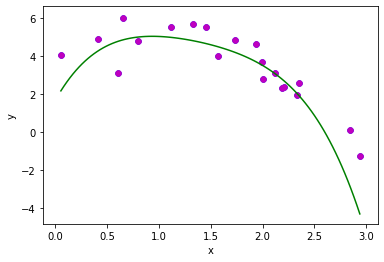

Average error on the testing set:  1.5584694832686972
Compared with all previous results, it appears that 3rd-order polynomial regression is the best for fitting the data.


In [10]:
"""
# Question 2f - TEST)
"""
test_features_vals = test_features.values
test_desired_outputs_vals = test_desired_outputs.values

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(test_features_vals.min(), test_features_vals.max(), 100)
    global y_pred
    y_pred = b[4]* np.power(x_line, 4) + b[3]*np.power(x_line, 3) + b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 

    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y')     

plot_regression_line(test_features_vals, test_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[4]*np.power(test_features_vals, 4) + result[3]*np.power(test_features_vals, 3) + result[2]*np.square(test_features_vals) + result[1]*test_features_vals + result[0]  - test_desired_outputs_vals)
error = np.sum(A)/test_features_vals.shape[0]
print('Average error on the testing set: ', error)
print('Compared with all previous results, it appears that 3rd-order polynomial regression is the best for fitting the data.')



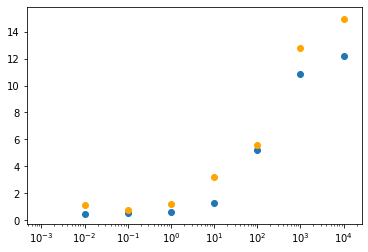

From my analysis, it appears that λ = 0.1 is the best in order to fit the data.


In [11]:
"""
# Question 3a
"""
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values

test_features_vals = test_features.values
test_desired_outputs_vals = test_desired_outputs.values

w0, w1, w2, w3, w4, train_errors, test_errors, weights = ([] for i in range(8))
lamd = [0.01, 0.1, 1, 10, 100, 1000, 10000]
weightList1, weightList2, weightList3, weightList4, weightList5, weightList6, weightList7 = ([] for i in range(7))

def func(train_features_vals, train_desired_outputs_vals, lamd): 
    for i in lamd:

        N = len(train_features_vals)
        X = np.c_[np.power(train_features_vals, 4), np.power(train_features_vals, 3), np.square(train_features_vals), train_features_vals, np.ones(N)]    
        A = np.dot(X.T,X)

        # Create I where I is an (n+1) x (n+1) identity matrix with the top left most value = 0, where n is the number of features
        identity_matrix = np.identity(5)
        identity_matrix[:1] = 0
        lam = i
        B = np.dot(lam, identity_matrix)
        B_1 = np.add(A, B)
        C = np.linalg.inv(B_1)
        D = np.dot(C, X.T)
        result = np.dot(D, train_desired_outputs_vals)

        w0.append(result[0])
        w1.append(result[1])
        w2.append(result[2])
        w3.append(result[3])
        w4.append(result[4])

        y_pred = []
        def plot_regression_line(x, y, b): 
            x_line = np.linspace(train_features_vals.min(), train_features_vals.max(), 100)
            global y_pred
            y_pred = b[0]* np.power(x_line, 4) + b[1]*np.power(x_line, 3) + b[2]*np.square(x_line) + b[3]*x_line + b[4]   
            regression_line = y_pred

        # Find average error on the training set
        A = np.square(result[0]*np.power(train_features_vals, 4) + result[1]*np.power(train_features_vals, 3) + result[2]*np.square(train_features_vals) + result[3]*train_features_vals + result[4]  - train_desired_outputs_vals)
        error = np.sum(A)/N
        train_errors.append(error)
#         print('Average error on the training set with lambda = ', lam, 'is: ', error)

        # Find average error on the training set
        A = np.square(result[0]*np.power(test_features_vals, 4) + result[1]*np.power(test_features_vals, 3) + result[2]*np.square(test_features_vals) + result[3]*test_features_vals + result[4]  - test_desired_outputs_vals)
        error = np.sum(A)/test_features_vals.shape[0]
        test_errors.append(error)
#         print('Average error on the testing set with lambda = ', lam, 'is: ', error)

func(train_features_vals, train_desired_outputs_vals, lamd)
        
plt.scatter(lamd, train_errors)
plt.xscale('log')

plt.scatter(lamd, test_errors, c = 'orange')
plt.xscale('log')
plt.show()

print('From my analysis, it appears that λ = 0.1 is the best in order to fit the data.')

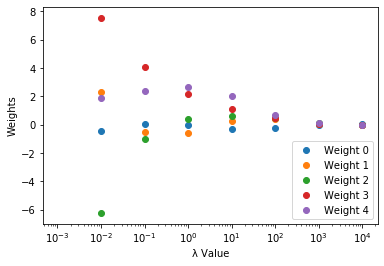

In [12]:
"""
# Question 3b
"""
w0 = np.array(w0)
w0 = w0.flatten()

w1 = np.array(w1)
w1 = w1.flatten()

w2 = np.array(w2)
w2 = w2.flatten()

w3 = np.array(w3)
w3 = w3.flatten()

w4 = np.array(w4)
w4 = w4.flatten()

plt.scatter(lamd, w0, label = 'Weight 0')
plt.scatter(lamd, w1, label = 'Weight 1')
plt.scatter(lamd, w2, label = 'Weight 2')
plt.scatter(lamd, w3, label = 'Weight 3')
plt.scatter(lamd, w4, label = 'Weight 4')
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('λ Value')
plt.ylabel('Weights')
plt.show()

In [13]:
"""
# Helper functions for Question 3c
"""
def tempFunc(train_features_vals, train_desired_outputs_vals, test_features_vals, i):
    N = len(train_features_vals)
    X = np.c_[np.power(train_features_vals, 4), np.power(train_features_vals, 3), np.square(train_features_vals), train_features_vals, np.ones(N)]    
    A = np.dot(X.T,X)

    # Create I where I is an (n+1) x (n+1) identity matrix with the top left most value = 0, where n is the number of features
    identity_matrix = np.identity(5)
    identity_matrix[:1] = 0
    lam = i
    B = np.dot(lam, identity_matrix)
    B_1 = np.add(A, B)
    C = np.linalg.inv(B_1)
    D = np.dot(C, X.T)
    result = np.dot(D, train_desired_outputs_vals)

    w0.append(result[0])
    w1.append(result[1])
    w2.append(result[2])
    w3.append(result[3])
    w4.append(result[4])

    y_pred = []
    def plot_regression_line(x, y, b): 
        x_line = np.linspace(train_features_vals.min(), train_features_vals.max(), 100)
        global y_pred
        y_pred = b[0]* np.power(x_line, 4) + b[1]*np.power(x_line, 3) + b[2]*np.square(x_line) + b[3]*x_line + b[4]   
        regression_line = y_pred

    # Find average error on the testing set
    A = np.square(result[0]*np.power(test_features_vals, 4) + result[1]*np.power(test_features_vals, 3) + result[2]*np.square(test_features_vals) + result[3]*test_features_vals + result[4]  - test_desired_outputs_vals)
    error = np.sum(A)/test_features_vals.shape[0]
    test_errors.append(error)
    return error
    
"""
# Plot test data and L2-reg 4th-order polynomial regression
"""
def plotbest():
    train_features_vals = train_features.values
    train_desired_outputs_vals = train_desired_outputs.values

    test_features_vals = test_features.values
    test_desired_outputs_vals = test_desired_outputs.values

    plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)

    N = len(train_features_vals)
    X = np.c_[np.power(train_features_vals, 4), np.power(train_features_vals, 3), np.square(train_features_vals), train_features_vals, np.ones(N)]    
    A = np.dot(X.T,X)

    # Create I where I is an (n+1) x (n+1) identity matrix with the top left most value = 0, where n is the number of features
    identity_matrix = np.identity(5)
    identity_matrix[:1] = 0
    lam = 1
    B = np.dot(lam, identity_matrix)
    B_1 = np.add(A, B)
    C = np.linalg.inv(B_1)
    D = np.dot(C, X.T)
    result = np.dot(D, train_desired_outputs_vals)

    y_pred = []
    def plot_regression_line(x, y, b): 
        x_line = np.linspace(test_features_vals.min(), test_features_vals.max(), 100)
        global y_pred
        y_pred = b[0]* np.power(x_line, 4) + b[1]*np.power(x_line, 3) + b[2]*np.square(x_line) + b[3]*x_line + b[4]   
        regression_line = y_pred
        # Plotting the regression line 
        plt.plot(x_line, regression_line, color = "g") 

        # Putting labels 
        plt.xlabel('x') 
        plt.ylabel('y')   

    plot_regression_line(test_features_vals, test_desired_outputs_vals, result)
    plt.title('Plot for best fit (Lambda = 1)')
    plt.show() 

    # Find average error on the training set
    A = np.square(result[0]*np.power(test_features_vals, 4) + result[1]*np.power(test_features_vals, 3) + result[2]*np.square(test_features_vals) + result[3]*test_features_vals + result[4]  - test_desired_outputs_vals)
    error = np.sum(A)/test_features_vals.shape[0]


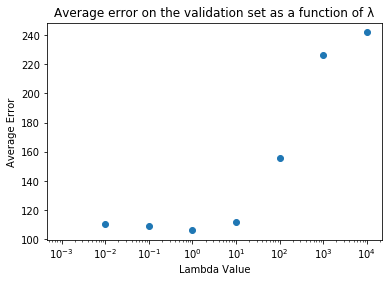

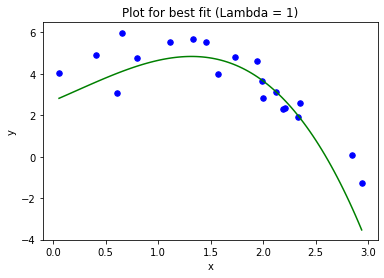

After performing 5-fold cross-validation on our training data, I found that λ = 1 returns the lowest average error. This is different from what we found in 3a, where we saw λ = 0.1 outperform the other values of λ.


In [14]:
"""
# Question 3c
"""
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import KFold

train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values

xtrains, ytrains, xtests = ([] for i in range(3))

kf = KFold(n_splits = 5)
numSplits = kf.get_n_splits(train_features_vals)

for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train_features_vals[train_index], train_features_vals[test_index]
    y_train, y_test = train_desired_outputs_vals[train_index], train_desired_outputs_vals[test_index]
    xtrains.append(X_train)
    ytrains.append(y_train)
    xtests.append(X_test)

xtrains0 = xtrains[0].flatten()
ytrains0 = ytrains[0].flatten()
xtests0 = xtests[0].flatten()
xtrains1 = xtrains[1].flatten()
ytrains1 = ytrains[1].flatten()
xtests1 = xtests[1].flatten()
xtrains2 = xtrains[2].flatten()
ytrains2 = ytrains[2].flatten()
xtests2 = xtests[2].flatten()
xtrains3 = xtrains[3].flatten()
ytrains3 = ytrains[3].flatten()
xtests3 = xtests[3].flatten()
xtrains4 = xtrains[4].flatten()
ytrains4 = ytrains[4].flatten()
xtests4 = xtests[4].flatten()

lam1, lam2, lam3, lam4, lam5, lam6, lam7 = ([] for i in range(7))
lamd = [0.01, 0.1, 1, 10, 100, 1000, 10000]
w0, w1, w2, w3, w4, train_errors, test_errors, weights = ([] for i in range(8))
for val in lamd:
    for i in range(5):
        if i == 0:
            error = tempFunc(xtrains0, ytrains0, xtests0, val)
            if val == 0.01:
                lam1.append(error)
            if val == 0.1:
                lam2.append(error)
            if val == 1:
                lam3.append(error)
            if val == 10:
                lam4.append(error)
            if val == 100:
                lam5.append(error)
            if val == 1000:
                lam6.append(error)
            if val == 10000:
                lam7.append(error)
        if i == 1:
            error = tempFunc(xtrains1, ytrains1, xtests1, val)
            if val == 0.01:
                lam1.append(error)
            if val == 0.1:
                lam2.append(error)
            if val == 1:
                lam3.append(error)
            if val == 10:
                lam4.append(error)
            if val == 100:
                lam5.append(error)
            if val == 1000:
                lam6.append(error)
            if val == 10000:
                lam7.append(error)
        if i == 2:
            error = tempFunc(xtrains2, ytrains2, xtests2, val)
            if val == 0.01:
                lam1.append(error)
            if val == 0.1:
                lam2.append(error)
            if val == 1:
                lam3.append(error)
            if val == 10:
                lam4.append(error)
            if val == 100:
                lam5.append(error)
            if val == 1000:
                lam6.append(error)
            if val == 10000:
                lam7.append(error)
        if i == 3:
            error = tempFunc(xtrains3, ytrains3, xtests3, val)
            if val == 0.01:
                lam1.append(error)
            if val == 0.1:
                lam2.append(error)
            if val == 1:
                lam3.append(error)
            if val == 10:
                lam4.append(error)
            if val == 100:
                lam5.append(error)
            if val == 1000:
                lam6.append(error)
            if val == 10000:
                lam7.append(error)
        if i == 4:
            error = tempFunc(xtrains4, ytrains4, xtests4, val)
            if val == 0.01:
                lam1.append(error)
            if val == 0.1:
                lam2.append(error)
            if val == 1:
                lam3.append(error)
            if val == 10:
                lam4.append(error)
            if val == 100:
                lam5.append(error)
            if val == 1000:
                lam6.append(error)
            if val == 10000:
                lam7.append(error)

averages = []
averages.append(np.average(lam1))
averages.append(np.average(lam2))
averages.append(np.average(lam3))
averages.append(np.average(lam4))
averages.append(np.average(lam5))
averages.append(np.average(lam6))
averages.append(np.average(lam7))

plt.scatter(lamd, averages)
plt.xscale('log')
plt.xlabel('Lambda Value')
plt.ylabel('Average Error')
plt.title('Average error on the validation set as a function of λ')
plt.show()

plotbest()

print('After performing 5-fold cross-validation on our training data, I found that λ = 1 returns the lowest average error. This is different from what we found in 3a, where we saw λ = 0.1 outperform the other values of λ.')